In [24]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df=pd.read_csv("../Res/Star39552_balanced.csv")
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [2]:
#Vmag - Visual Apparent Magnitude of the Star
#Plx - Distance Between the Star and the Earth
#e_Plx - Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)
#B-V - B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)
#SpType - Stellar classification. (Roman Numerals >IV are giants. Otherwise are dwarfs)

In [3]:
df['TargetClass'].value_counts()

TargetClass
1    19776
0    19776
Name: count, dtype: int64

In [4]:
df.info
#No missing values 

<bound method DataFrame.info of         Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0      10.00  31.66   6.19  1.213    K7V  22.502556            1
1       8.26   3.21   1.00  1.130  K0III  15.792525            0
2       8.27  12.75   1.06  0.596    F9V  18.797552            1
3       6.54   5.23   0.76  1.189  K1III  15.132508            0
4       8.52   0.96   0.72  0.173    B8V  13.431356            1
...      ...    ...    ...    ...    ...        ...          ...
39547   5.83   0.17   0.52  0.474  B7Iab   6.982245            0
39548   7.05  18.12   0.92  0.424    F5V  18.340790            1
39549   9.21   3.89   1.46  0.227   A1IV  17.159748            1
39550   9.01   2.13   1.46  1.467  M5III  15.651898            0
39551   9.12   3.82   0.79  0.480    F5V  17.030317            1

[39552 rows x 7 columns]>

In [5]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [6]:
# Check unique counts for text variable 
unique_count_sptype = df['SpType'].nunique
unique_count_sptype
# Looks like the text field has unique values for this field  and it is also used to code the target variable and hence it should be dropped

<bound method IndexOpsMixin.nunique of 0          K7V
1        K0III
2          F9V
3        K1III
4          B8V
         ...  
39547    B7Iab
39548      F5V
39549     A1IV
39550    M5III
39551      F5V
Name: SpType, Length: 39552, dtype: object>

In [7]:
# Drop SpType
df2 = df.drop(columns='SpType')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   Amag         39552 non-null  float64
 5   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [11]:
# Scale the data 
from sklearn.preprocessing import StandardScaler

#Initialize the StandardScaler
scaler = StandardScaler()
# Specify the columns to scale
columns_to_scale = ['Vmag', 'Plx','e_Plx','B-V','Amag']

# Fit the scaler on the specified columns and transform them
df2[columns_to_scale]= scaler.fit_transform(df2[columns_to_scale])
print(df)
print(df2)


        Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0      10.00  31.66   6.19  1.213    K7V  22.502556            1
1       8.26   3.21   1.00  1.130  K0III  15.792525            0
2       8.27  12.75   1.06  0.596    F9V  18.797552            1
3       6.54   5.23   0.76  1.189  K1III  15.132508            0
4       8.52   0.96   0.72  0.173    B8V  13.431356            1
...      ...    ...    ...    ...    ...        ...          ...
39547   5.83   0.17   0.52  0.474  B7Iab   6.982245            0
39548   7.05  18.12   0.92  0.424    F5V  18.340790            1
39549   9.21   3.89   1.46  0.227   A1IV  17.159748            1
39550   9.01   2.13   1.46  1.467  M5III  15.651898            0
39551   9.12   3.82   0.79  0.480    F5V  17.030317            1

[39552 rows x 7 columns]
           Vmag       Plx     e_Plx       B-V      Amag  TargetClass
0      1.588193  1.971907  6.446066  0.911833  2.639982            1
1      0.258771 -0.313943 -0.139198  0.750348 -0.105635 

In [13]:
# define X and y dataframes
X = df2.drop(columns='TargetClass')
y = df2['TargetClass']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=55)
print(X_train.describe())
print(X_test.describe())

               Vmag           Plx         e_Plx           B-V          Amag
count  29664.000000  29664.000000  29664.000000  29664.000000  29664.000000
mean      -0.004170      0.002951     -0.003266      0.000605      0.002415
std        1.002264      1.035449      0.976312      1.000114      0.993539
min       -6.525860     -1.891943     -0.875124     -2.226419     -5.516040
25%       -0.543465     -0.375810     -0.392966     -0.747763     -0.525208
50%        0.174728     -0.214314     -0.151887     -0.082368     -0.010117
75%        0.686631      0.091805      0.152634      0.744511      0.627819
max        3.544122     61.481954     41.174137      5.244682      5.891522
              Vmag          Plx        e_Plx          B-V         Amag
count  9888.000000  9888.000000  9888.000000  9888.000000  9888.000000
mean      0.012510    -0.008854     0.009798    -0.001815    -0.007244
std       0.993174     0.885221     1.067955     0.999758     1.019202
min      -5.097115    -2.808694 

In [17]:
#Create a random Classifier model 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [18]:
# Check the model's balanced accuracy on the test set

y_test_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_test_pred))

0.8758428927971565


[[4246  707]
 [ 521 4414]]


Text(0.5, 1.0, 'Confusion Matrix')

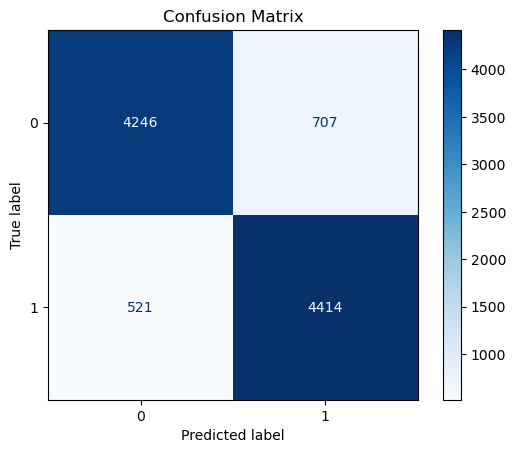

In [27]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
cm_display.ax_.set_title('Confusion Matrix')

In [28]:
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_test_pred))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4953
           1       0.86      0.89      0.88      4935

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

